In [1]:
#Librarys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import plotly.express as px
import datetime

In [2]:
#Import data
data_mpa = "../data/data_mpa.txt"
data_spg = "../data/data_spg.txt"
data_sps = "../data/data_sps.txt"

In [3]:
def first_view(data):
    #convert data in dataframe
    df = pd.read_csv(data, sep=" ")
    #convert object to datetime
    df["start_time"] = pd.to_datetime(df["start_time"])
    print('Shape of Dataframe:',df.shape)
    print("Types of the columns:", np.unique(df.dtypes))
    print("Missing Information:",sum(df.isna().sum()))
    return df

In [4]:
df_mpa = first_view(data_mpa)
df_spg = first_view(data_spg)
df_sps = first_view(data_sps)

Shape of Dataframe: (86747, 40)
Types of the columns: [dtype('<M8[ns]') dtype('int64') dtype('float64')]
Missing Information: 0
Shape of Dataframe: (52463, 22)
Types of the columns: [dtype('<M8[ns]') dtype('int64') dtype('float64')]
Missing Information: 0
Shape of Dataframe: (11254, 40)
Types of the columns: [dtype('<M8[ns]') dtype('int64') dtype('float64')]
Missing Information: 0


In [5]:
# add new column: sensortype
df_mpa['sensortype'] = 'mpa'
df_spg['sensortype'] = 'spg'
df_sps['sensortype'] = 'sps'

In [6]:
df_all = df_mpa.append(df_spg, sort=False)
df_all = df_all.append(df_sps, sort=False)
df_all.shape

(150464, 68)

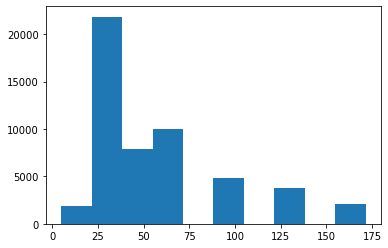

In [7]:
n, bins, patches = plt.hist(df_spg["size_mm"])

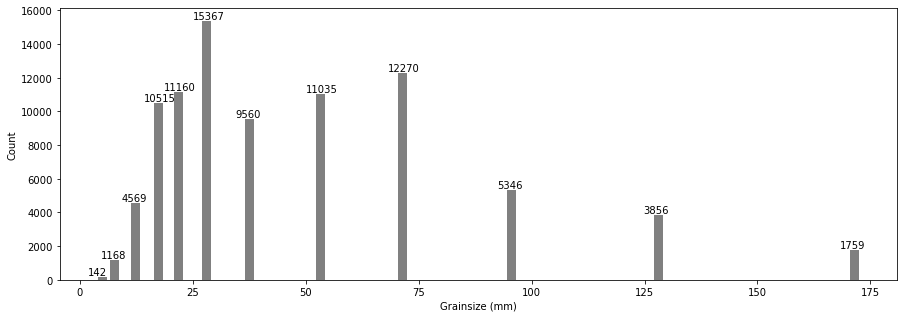

In [8]:
df = df_mpa.groupby(["size_mm"])["size_mm"].count().reset_index(name="count")
x = list(df["size_mm"])
y = list(df["count"])

fig = plt.subplots(figsize=(15, 5))
barplot = plt.bar(x, y,color="gray",width=2)
for bar in barplot:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2-3.2, yval, int(yval), va='bottom',size=10) #va: vertical alignment y positional argument
    
plt.xlabel('Grainsize (mm)')
plt.ylabel('Count')
plt.show()

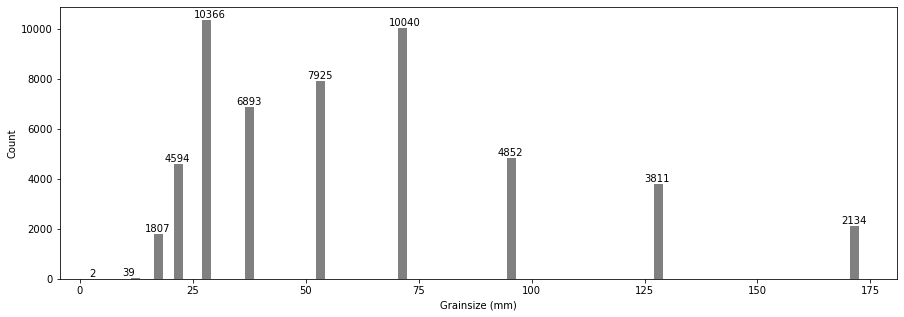

In [9]:
df = df_spg.groupby(["size_mm"])["size_mm"].count().reset_index(name="count")
x = list(df["size_mm"])
y = list(df["count"])

fig = plt.subplots(figsize=(15, 5))
barplot = plt.bar(x, y,color="gray",width=2)
for bar in barplot:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2-3, yval, int(yval), va='bottom',size=10) #va: vertical alignment y positional argument
    
plt.xlabel('Grainsize (mm)')
plt.ylabel('Count')
plt.show()

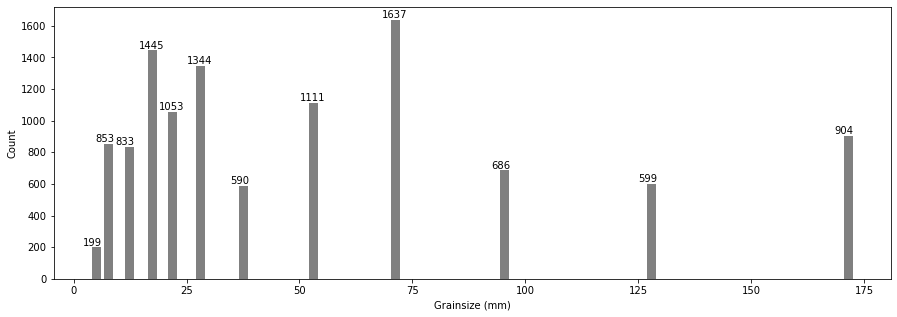

In [10]:
df = df_sps.groupby(["size_mm"])["size_mm"].count().reset_index(name="count")
x = list(df["size_mm"])
y = list(df["count"])

fig = plt.subplots(figsize=(15, 5))
barplot = plt.bar(x, y,color="gray",width=2)
for bar in barplot:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2-3, yval, int(yval), va='bottom',size=10) #va: vertical alignment y positional argument
    
plt.xlabel('Grainsize (mm)')
plt.ylabel('Count')
plt.show()

In [11]:
df_spg["size_mm"].unique()

array([ 28.1,  21.8,  17.4,  37.6,  53.2,  71.3,  95.5, 128. ,  12.3,
       171.5,   5. ])

In [12]:
len(df_spg["size_mm"].unique())

11

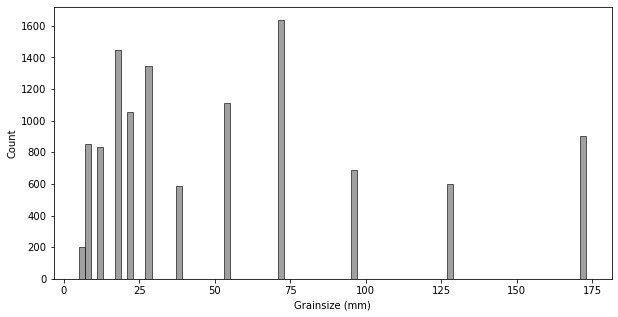

In [13]:
fig = plt.subplots(figsize=(10, 5))
p = sns.histplot(data=df_sps, x="size_mm",color="gray",binwidth=2)
p.set_xlabel('Grainsize (mm)')
plt.show()

In [14]:
len(df_sps["size_mm"].unique())

12

In [15]:
colorscale = [
[0, 'rgb(128,128,128)'], 
[0.5, 'rgb(255,255,255)'],
[1, 'rgb(31, 119, 180)']
]

In [26]:
import matplotlib.colors
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", [[128/255,128/255,128/255],[1,1,1],[31/255,119/255,180/255]])

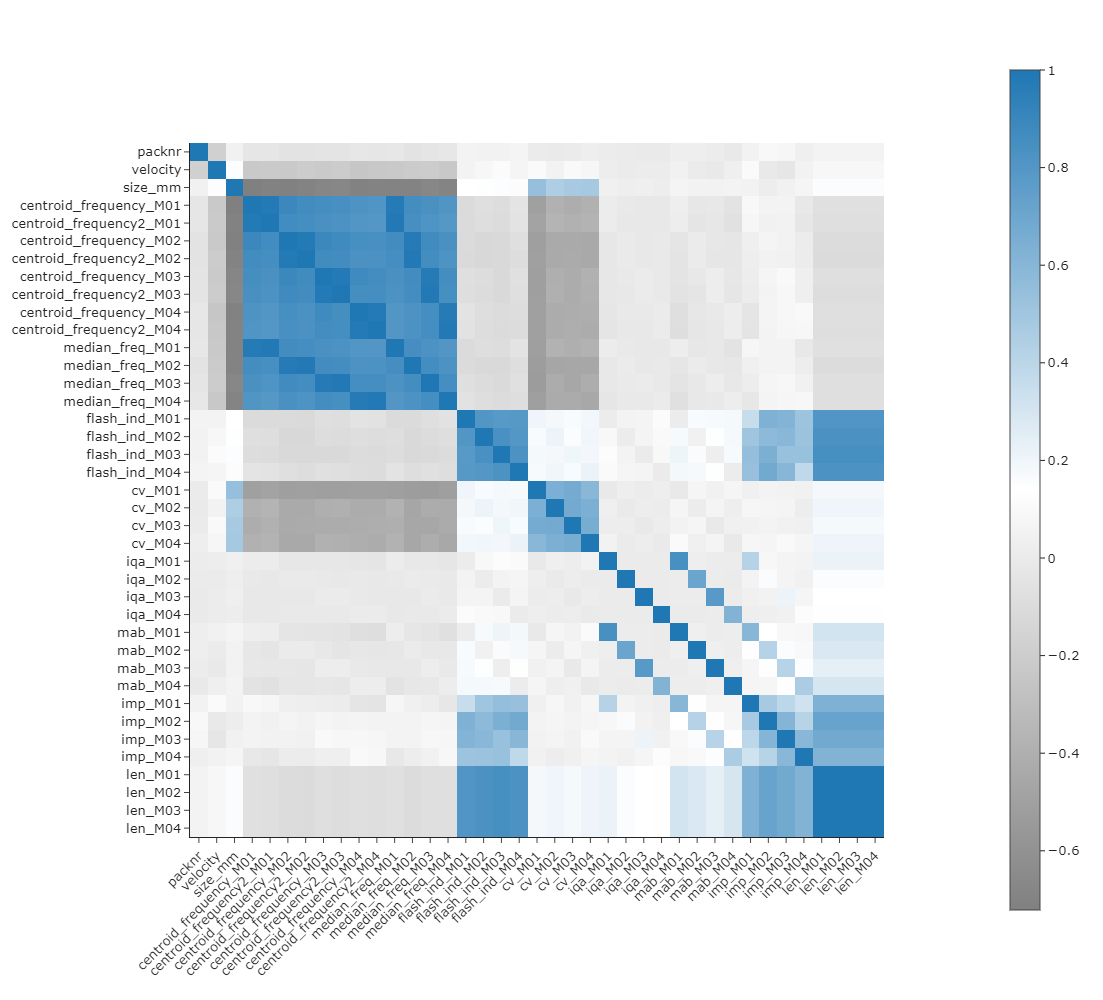

In [127]:
fig = px.imshow(df_mpa.corr(method='pearson'), 
          template='simple_white', 
          color_continuous_scale=colorscale,
          width=1000, height=1000,)
fig.update_layout(font_size=13)
fig.update_xaxes(tickangle=-45)

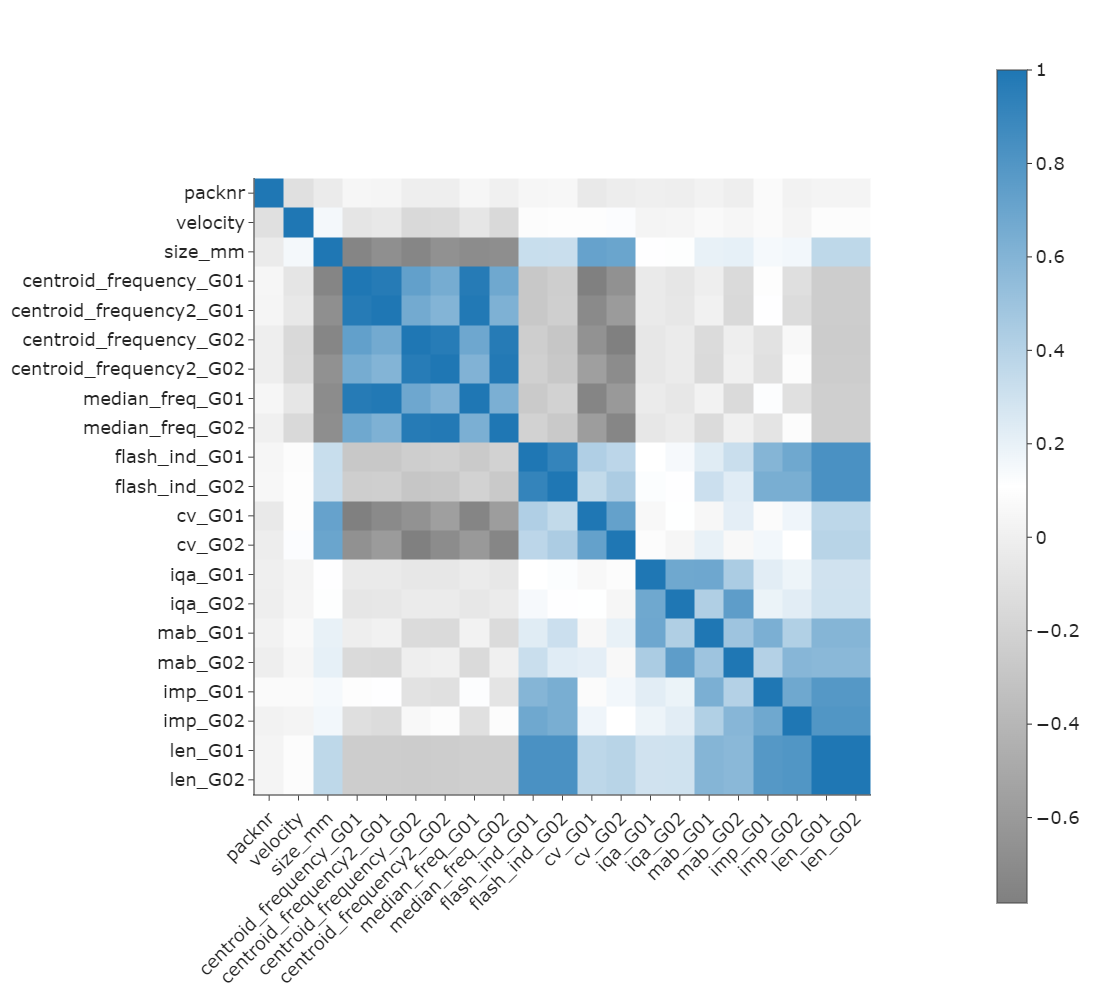

In [125]:
fig = px.imshow(df_spg.corr(method='pearson'), 
          template='simple_white', 
          color_continuous_scale=colorscale,
          width=1000, height=1000)
fig.update_layout(font_size=18)
fig.update_xaxes(tickangle=-45)

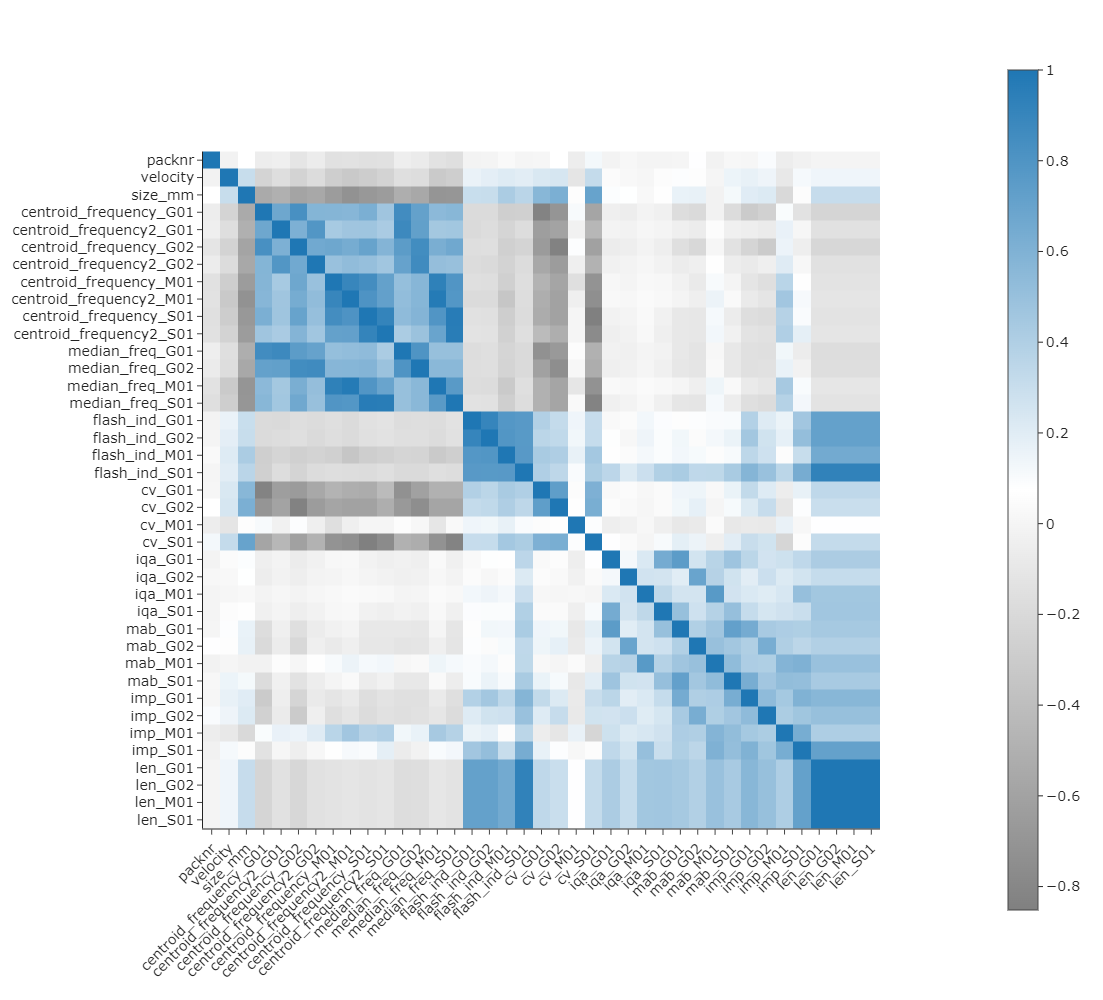

In [128]:
fig = px.imshow(df_sps.corr(method='pearson'), 
          template='simple_white', 
          color_continuous_scale=colorscale,
          width=1000, height=1000)
fig.update_layout(font_size=14)
fig.update_xaxes(tickangle=-45)

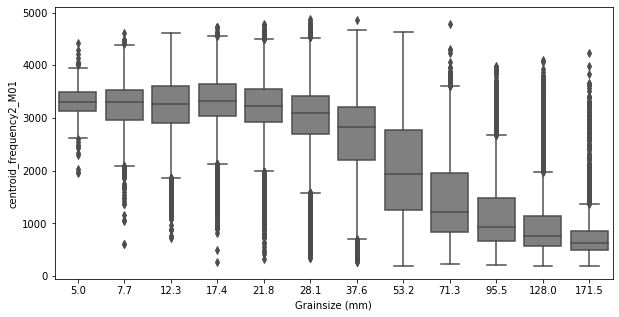

In [21]:
fig = plt.subplots(figsize=(10, 5))
p = sns.boxplot(data=df_mpa, x="size_mm",y ="centroid_frequency2_M01",color="gray")
p.set_xlabel('Grainsize (mm)')
plt.show()

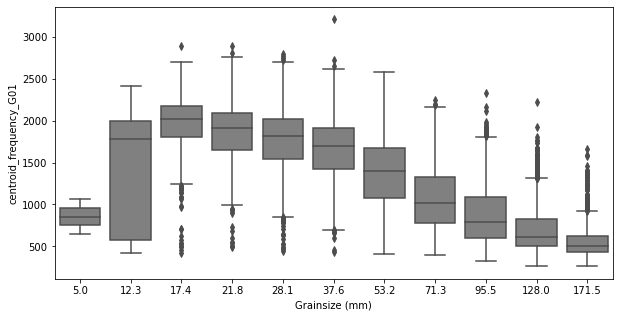

In [22]:
fig = plt.subplots(figsize=(10, 5))
p = sns.boxplot(data=df_spg, x="size_mm",y ="centroid_frequency_G01",color="gray")
p.set_xlabel('Grainsize (mm)')
plt.show()

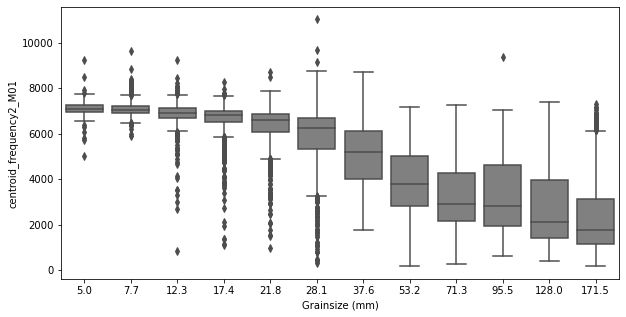

In [23]:
fig = plt.subplots(figsize=(10, 5))
p = sns.boxplot(data=df_sps, x="size_mm",y ="centroid_frequency2_M01",color="gray")
p.set_xlabel('Grainsize (mm)')
plt.show()

In [15]:
compare = "compare.txt"

In [16]:
df_compare = pd.read_csv(compare, sep=" ")

In [17]:
df_compare

,System,Complexity,Algorithm,R2
0,MPA,Benchmark,Linear_Regression,0.696
1,MPA,Simple,Catboost,0.755
2,MPA,Complex,Catboost,0.824
3,SPG,Benchmark,Linear_Regression,0.636
4,SPG,Simple,Catboost,0.796
5,SPG,Complex,Catboost,0.804
6,SPS,Benchmark,Linear_Regression,0.564
7,SPS,Simple,Catboost,0.794
8,SPS,Complex,Catboost,0.841


In [24]:
colorscale = [
[0, 'rgb(128,128,128)'], 
[0.5, 'rgb(255,255,255)'],
[1, 'rgb(31, 119, 180)']
]

In [43]:
colors = ["#808080", "#507C9A", "#1f77b4"]
# Set your custom color palette
customPalette = sns.set_palette(sns.color_palette(colors))

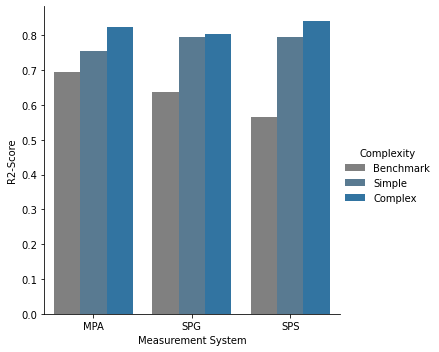

In [44]:
sns.catplot(x = 'System', y='R2', 
            hue = 'Complexity',data=df_compare, 
            kind='bar',palette=customPalette)
plt.xlabel("Measurement System")
plt.ylabel("R2-Score")
plt.show()